In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# The following are just data from Soung 2022 paper to find the catalyt performance over time in batch [1]

# Curve fitting

In [2]:
# Define the types of functions we want to fit
def linear_func(x, a, b):
    return a * x + b

def quadratic_func(x, a, b, c):
    return a * x**2 + b * x + c

def cubic_func(x, a, b, c, d):
    return a * x**3 + b * x**2 + c * x + d

In [3]:
# Function to calculate the R-squared value
def r_squared(y, y_fit):
    ss_res = np.sum((y - y_fit) ** 2)
    ss_tot = np.sum((y - np.mean(y)) ** 2)
    return 1 - (ss_res / ss_tot)

# Find temperature dependence

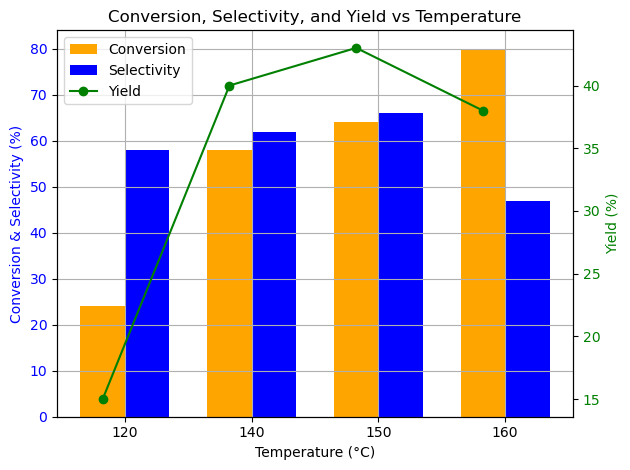

In [4]:
# Given data
Temp = np.array([120, 140, 150, 160])
ConvBz = np.array([24, 58, 64, 80])
SCHE = np.array([58, 62, 66, 47])
YieldHE = np.array([15, 40, 43, 38])

# Create figure and axis
fig, ax1 = plt.subplots()

# Bar chart for Conversion and Selectivity
bar_width = 0.35
index = range(len(Temp))

bars1 = ax1.bar(index, ConvBz, bar_width, label='Conversion', color='orange')
bars2 = ax1.bar([i + bar_width for i in index], SCHE, bar_width, label='Selectivity', color='blue')

# Make the y-axis label and tick labels match the line color.
ax1.set_xlabel('Temperature (°C)')
ax1.set_ylabel('Conversion & Selectivity (%)', color='b')
for tl in ax1.get_yticklabels():
    tl.set_color('b')

# Line chart for Yield
ax2 = ax1.twinx()
line1 = ax2.plot(index, YieldHE, color='g', marker='o', label='Yield')

# Make the y-axis label, tick labels and line color match.
ax2.set_ylabel('Yield (%)', color='g')
for tl in ax2.get_yticklabels():
    tl.set_color('g')

# Labeling the x-axis with the temperature values
ax1.set_xticks([i + bar_width / 2 for i in index])
ax1.set_xticklabels(Temp)

# Adding a legend
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc=0)

# Title and grid
plt.title('Conversion, Selectivity, and Yield vs Temperature')
ax1.grid(True)

# Display the plot
plt.tight_layout()
plt.show()


# Curve Fitting the temperature dependence

/Users/nokman/anaconda3/lib/python3.10/site-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


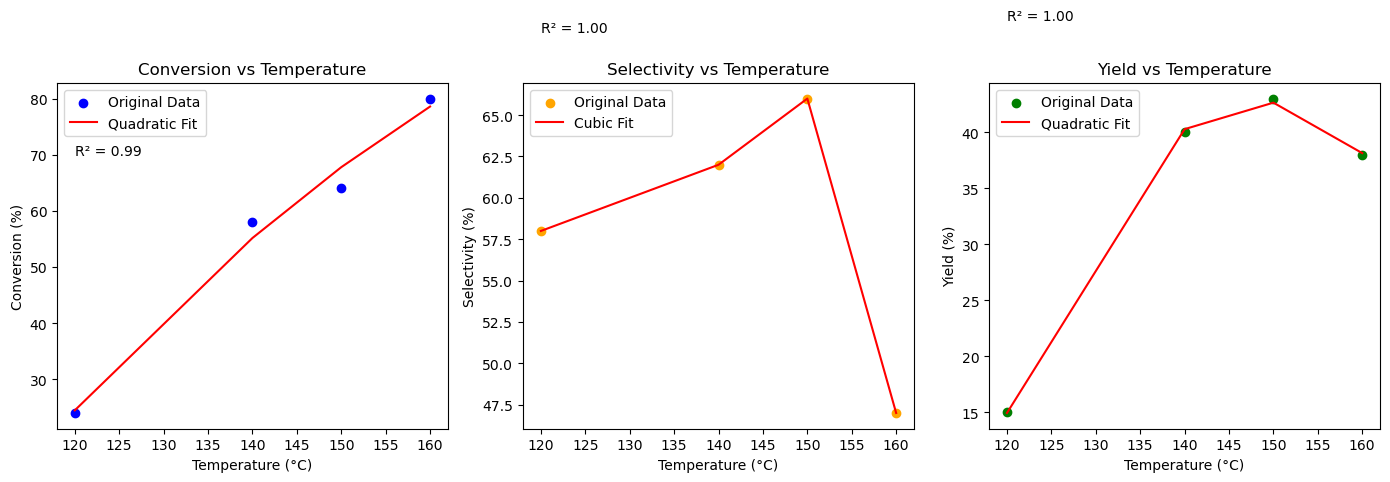

In [5]:
# Fit the functions to the data
conv_fit_params, conv_covariance = curve_fit(quadratic_func, Temp, ConvBz)
sche_fit_params, sche_covariance = curve_fit(cubic_func, Temp, SCHE)
yield_fit_params, yield_covariance = curve_fit(quadratic_func, Temp, YieldHE)


# Calculate fitted values from the fit parameters
ConvBz_fit = quadratic_func(Temp, *conv_fit_params)
SCHE_fit = cubic_func(Temp, *sche_fit_params)
YieldHE_fit = quadratic_func(Temp, *yield_fit_params)

# Calculate R-squared for each fit
ConvBz_r2 = r_squared(ConvBz, ConvBz_fit)
SCHE_r2 = r_squared(SCHE, SCHE_fit)
YieldHE_r2 = r_squared(YieldHE, YieldHE_fit)

# Plotting the original data and the fits
plt.figure(figsize=(14, 5))

# Plot Conversion
plt.subplot(1, 3, 1)
plt.scatter(Temp, ConvBz, label='Original Data', color='blue')
plt.plot(Temp, ConvBz_fit, label='Quadratic Fit', color='red')
plt.title('Conversion vs Temperature')
plt.xlabel('Temperature (°C)')
plt.ylabel('Conversion (%)')
plt.legend()
plt.text(120, 70, f'R² = {ConvBz_r2:.2f}')

# Plot Selectivity
plt.subplot(1, 3, 2)
plt.scatter(Temp, SCHE, label='Original Data', color='orange')
plt.plot(Temp, SCHE_fit, label='Cubic Fit', color='red')
plt.title('Selectivity vs Temperature')
plt.xlabel('Temperature (°C)')
plt.ylabel('Selectivity (%)')
plt.legend()
plt.text(120, 70, f'R² = {SCHE_r2:.2f}')

# Plot Yield
plt.subplot(1, 3, 3)
plt.scatter(Temp, YieldHE, label='Original Data', color='green')
plt.plot(Temp, YieldHE_fit, label='Quadratic Fit', color='red')
plt.title('Yield vs Temperature')
plt.xlabel('Temperature (°C)')
plt.ylabel('Yield (%)')
plt.legend()
plt.text(120, 50, f'R² = {YieldHE_r2:.2f}')

plt.tight_layout()
plt.show()

In [6]:
# Using the previously defined functions and data, let's format the fit parameters into equation strings

# Fit the functions to the data (repeating fitting to capture the parameters)
conv_fit_params, _ = curve_fit(quadratic_func, Temp, ConvBz)
sche_fit_params, _ = curve_fit(cubic_func, Temp, SCHE)
yield_fit_params, _ = curve_fit(quadratic_func, Temp, YieldHE)

# Format the fit parameters into strings representing the equations
conv_eq = f'Conversion(T) = {conv_fit_params[0]:.4f} T^2 + {conv_fit_params[1]:.4f} T + {conv_fit_params[2]:.4f}'
sche_eq = f'Selectivity(T) = {sche_fit_params[0]:.4f} T^3 + {sche_fit_params[1]:.4f} T^2 + {sche_fit_params[2]:.4f} T + {sche_fit_params[3]:.4f}'
yield_eq = f'Yield(T) = {yield_fit_params[0]:.4f} T^2 + {yield_fit_params[1]:.4f} T + {yield_fit_params[2]:.4f}'

(conv_eq, sche_eq, yield_eq)


('Conversion(T) = -0.0091 T^2 + 3.8982 T + -312.4000',
 'Selectivity(T) = -0.0030 T^3 + 1.2538 T^2 + -171.2583 T + 7811.0000',
 'Yield(T) = -0.0343 T^2 + 10.1886 T + -713.5000')

# Find Pressure dependence

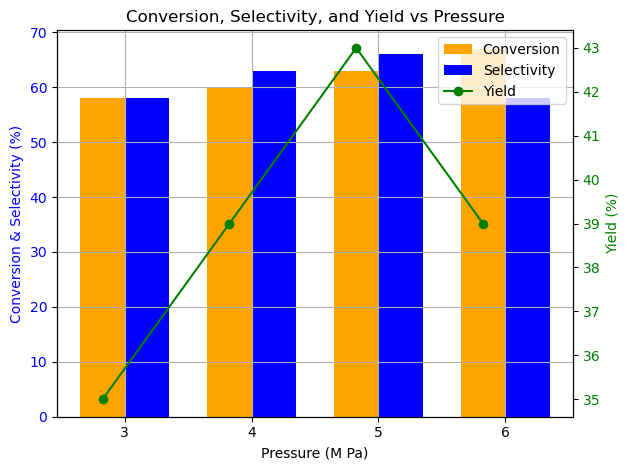

In [7]:
# Given data
Pressure = np.array([3, 4, 5, 6])
ConvBz = np.array([58, 60, 63, 67])
SCHE = np.array([58, 63, 66, 58])
YieldHE = np.array([35, 39, 43, 39])

# Create figure and axis
fig, ax1 = plt.subplots()

# Bar chart for Conversion and Selectivity
bar_width = 0.35
index = range(len(Pressure))

bars1 = ax1.bar(index, ConvBz, bar_width, label='Conversion', color='orange')
bars2 = ax1.bar([i + bar_width for i in index], SCHE, bar_width, label='Selectivity', color='blue')

# Make the y-axis label and tick labels match the line color.
ax1.set_xlabel('Pressure (M Pa)')
ax1.set_ylabel('Conversion & Selectivity (%)', color='b')
for tl in ax1.get_yticklabels():
    tl.set_color('b')

# Line chart for Yield
ax2 = ax1.twinx()
line1 = ax2.plot(index, YieldHE, color='g', marker='o', label='Yield')

# Make the y-axis label, tick labels and line color match.
ax2.set_ylabel('Yield (%)', color='g')
for tl in ax2.get_yticklabels():
    tl.set_color('g')

# Labeling the x-axis with the temperature values
ax1.set_xticks([i + bar_width / 2 for i in index])
ax1.set_xticklabels(Pressure)

# Adding a legend
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc=0)

# Title and grid
plt.title('Conversion, Selectivity, and Yield vs Pressure')
ax1.grid(True)

# Display the plot
plt.tight_layout()
plt.show()


# Curve Fitting for the pressure dependence

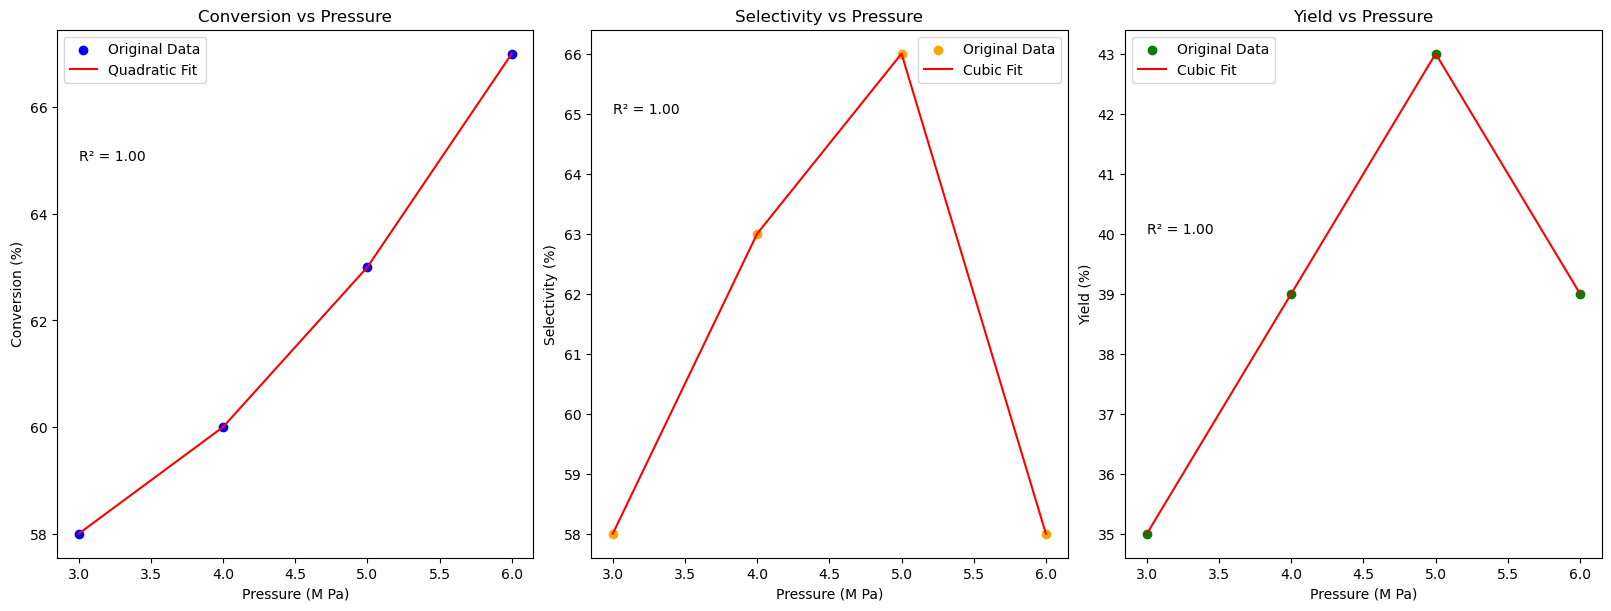

In [8]:
# Fit the functions to the data
conv_fit_params, conv_covariance = curve_fit(quadratic_func, Pressure, ConvBz)
sche_fit_params, sche_covariance = curve_fit(cubic_func, Pressure, SCHE)
yield_fit_params, yield_covariance = curve_fit(cubic_func, Pressure, YieldHE)


# Calculate fitted values from the fit parameters
ConvBz_fit = quadratic_func(Pressure, *conv_fit_params)
SCHE_fit = cubic_func(Pressure, *sche_fit_params)
YieldHE_fit = cubic_func(Pressure, *yield_fit_params)

# Calculate R-squared for each fit
ConvBz_r2 = r_squared(ConvBz, ConvBz_fit)
SCHE_r2 = r_squared(SCHE, SCHE_fit)
YieldHE_r2 = r_squared(YieldHE, YieldHE_fit)

# Plotting the original data and the fits
plt.figure(figsize=(16, 6), constrained_layout=True)

# Plot Conversion
plt.subplot(1, 3, 1)
plt.scatter(Pressure, ConvBz, label='Original Data', color='blue')
plt.plot(Pressure, ConvBz_fit, label='Quadratic Fit', color='red')
plt.title('Conversion vs Pressure')
plt.xlabel('Pressure (M Pa)')
plt.ylabel('Conversion (%)')
plt.legend()
plt.text(3, 65, f'R² = {ConvBz_r2:.2f}')

# Plot Selectivity
plt.subplot(1, 3, 2)
plt.scatter(Pressure, SCHE, label='Original Data', color='orange')
plt.plot(Pressure, SCHE_fit, label='Cubic Fit', color='red')
plt.title('Selectivity vs Pressure')
plt.xlabel('Pressure (M Pa)')
plt.ylabel('Selectivity (%)')
plt.legend()
plt.text(3, 65, f'R² = {SCHE_r2:.2f}')

# Plot Yield
plt.subplot(1, 3, 3)
plt.scatter(Pressure, YieldHE, label='Original Data', color='green')
plt.plot(Pressure, YieldHE_fit, label='Cubic Fit', color='red')
plt.title('Yield vs Pressure')
plt.xlabel('Pressure (M Pa)')
plt.ylabel('Yield (%)')
plt.legend()
plt.text(3, 40, f'R² = {YieldHE_r2:.2f}')

plt.show()

In [9]:
# Using the previously defined functions and data, let's format the fit parameters into equation strings

# Fit the functions to the data (repeating fitting to capture the parameters)
conv_fit_params, _ = curve_fit(quadratic_func, Pressure, ConvBz)
sche_fit_params, _ = curve_fit(cubic_func, Pressure, SCHE)
yield_fit_params, _ = curve_fit(cubic_func, Pressure, YieldHE)

# Format the fit parameters into strings representing the equations
conv_eq = f'Conversion(P) = {conv_fit_params[0]:.4f} P^2 + {conv_fit_params[1]:.4f} P + {conv_fit_params[2]:.4f}'
sche_eq = f'Selectivity(P) = {sche_fit_params[0]:.4f} P^3 + {sche_fit_params[1]:.4f} P^2 + {sche_fit_params[2]:.4f} P + {sche_fit_params[3]:.4f}'
yield_eq = f'Yield(P) = {yield_fit_params[0]:.4f} P^3 + {yield_fit_params[1]:.4f} P^2 + {yield_fit_params[2]:.4f} P + {yield_fit_params[3]:.4f}'

(conv_eq, sche_eq, yield_eq)


('Conversion(P) = 0.5000 P^2 + -1.5000 P + 58.0000',
 'Selectivity(P) = -1.5000 P^3 + 17.0000 P^2 + -58.5000 P + 121.0000',
 'Yield(P) = -1.3333 P^3 + 16.0000 P^2 + -58.6667 P + 103.0000')

# Reuse times (catalyst deactivation)

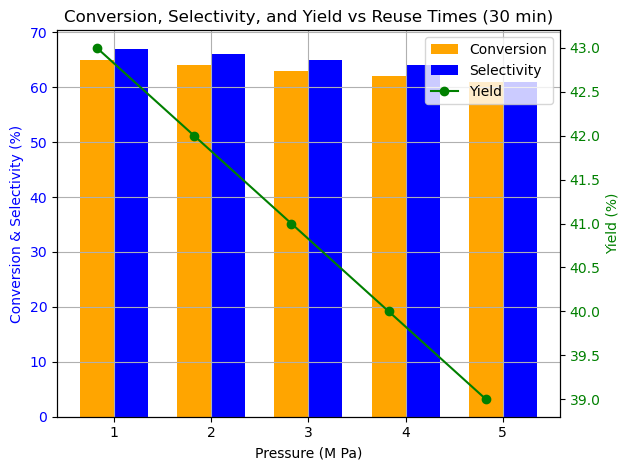

In [10]:
# Given data
ReuseTimes = np.array([1, 2, 3, 4, 5])
ConvBz = np.array([65, 64, 63, 62, 61])
SCHE = np.array([67, 66, 65, 64, 61])
YieldHE = np.array([43, 42, 41, 40, 39])

# Create figure and axis
fig, ax1 = plt.subplots()

# Bar chart for Conversion and Selectivity
bar_width = 0.35
index = range(len(ReuseTimes))

bars1 = ax1.bar(index, ConvBz, bar_width, label='Conversion', color='orange')
bars2 = ax1.bar([i + bar_width for i in index], SCHE, bar_width, label='Selectivity', color='blue')

# Make the y-axis label and tick labels match the line color.
ax1.set_xlabel('Pressure (M Pa)')
ax1.set_ylabel('Conversion & Selectivity (%)', color='b')
for tl in ax1.get_yticklabels():
    tl.set_color('b')

# Line chart for Yield
ax2 = ax1.twinx()
line1 = ax2.plot(index, YieldHE, color='g', marker='o', label='Yield')

# Make the y-axis label, tick labels and line color match.
ax2.set_ylabel('Yield (%)', color='g')
for tl in ax2.get_yticklabels():
    tl.set_color('g')

# Labeling the x-axis with the temperature values
ax1.set_xticks([i + bar_width / 2 for i in index])
ax1.set_xticklabels(ReuseTimes)

# Adding a legend
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc=0)

# Title and grid
plt.title('Conversion, Selectivity, and Yield vs Reuse Times (30 min)')
ax1.grid(True)

# Display the plot
plt.tight_layout()
plt.show()

# Curve Fitting for the reuse times (30 mins per reuse times) dependence

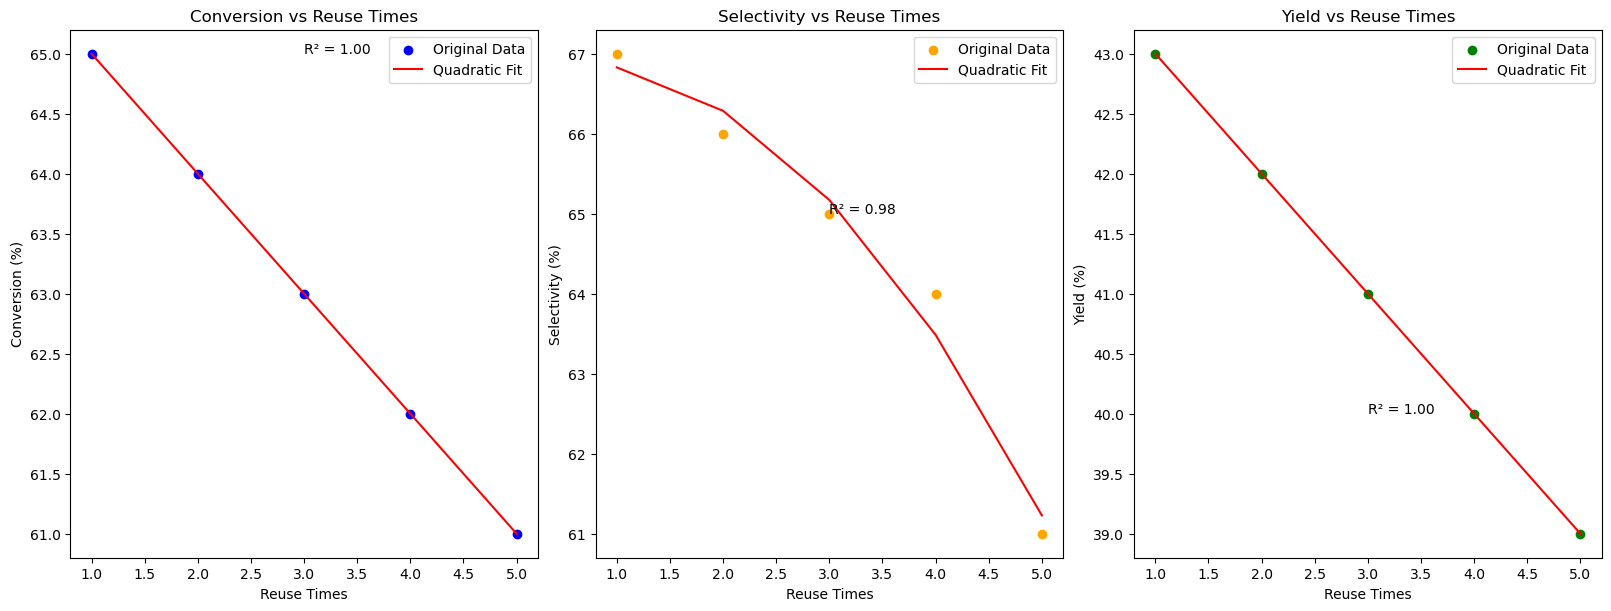

In [11]:
# Fit the functions to the data
conv_fit_params, conv_covariance = curve_fit(quadratic_func, ReuseTimes, ConvBz)
sche_fit_params, sche_covariance = curve_fit(quadratic_func, ReuseTimes, SCHE)
yield_fit_params, yield_covariance = curve_fit(quadratic_func, ReuseTimes, YieldHE)


# Calculate fitted values from the fit parameters
ConvBz_fit = quadratic_func(ReuseTimes, *conv_fit_params)
SCHE_fit = quadratic_func(ReuseTimes, *sche_fit_params)
YieldHE_fit = quadratic_func(ReuseTimes, *yield_fit_params)

# Calculate R-squared for each fit
ConvBz_r2 = r_squared(ConvBz, ConvBz_fit)
SCHE_r2 = r_squared(SCHE, SCHE_fit)
YieldHE_r2 = r_squared(YieldHE, YieldHE_fit)

# Plotting the original data and the fits
plt.figure(figsize=(16, 6), constrained_layout=True)

# Plot Conversion
plt.subplot(1, 3, 1)
plt.scatter(ReuseTimes, ConvBz, label='Original Data', color='blue')
plt.plot(ReuseTimes, ConvBz_fit, label='Quadratic Fit', color='red')
plt.title('Conversion vs Reuse Times')
plt.xlabel('Reuse Times')
plt.ylabel('Conversion (%)')
plt.legend()
plt.text(3, 65, f'R² = {ConvBz_r2:.2f}')

# Plot Selectivity
plt.subplot(1, 3, 2)
plt.scatter(ReuseTimes, SCHE, label='Original Data', color='orange')
plt.plot(ReuseTimes, SCHE_fit, label='Quadratic Fit', color='red')
plt.title('Selectivity vs Reuse Times')
plt.xlabel('Reuse Times')
plt.ylabel('Selectivity (%)')
plt.legend()
plt.text(3, 65, f'R² = {SCHE_r2:.2f}')

# Plot Yield
plt.subplot(1, 3, 3)
plt.scatter(ReuseTimes, YieldHE, label='Original Data', color='green')
plt.plot(ReuseTimes, YieldHE_fit, label='Quadratic Fit', color='red')
plt.title('Yield vs Reuse Times')
plt.xlabel('Reuse Times')
plt.ylabel('Yield (%)')
plt.legend()
plt.text(3, 40, f'R² = {YieldHE_r2:.2f}')

plt.show()

In [12]:
# Using the previously defined functions and data, let's format the fit parameters into equation strings

# Fit the functions to the data (repeating fitting to capture the parameters)
conv_fit_params, _ = curve_fit(quadratic_func, ReuseTimes, ConvBz)
sche_fit_params, _ = curve_fit(quadratic_func, ReuseTimes, SCHE)
yield_fit_params, _ = curve_fit(quadratic_func, ReuseTimes, YieldHE)

# Format the fit parameters into strings representing the equations
conv_eq = f'Conversion(R-t) = {conv_fit_params[0]:.4f} (R-t)^2 + {conv_fit_params[1]:.4f} (R-t) + {conv_fit_params[2]:.4f}'
sche_eq = f'Selectivity(R-t) = {sche_fit_params[0]:.4f} (R-t)^2 + {sche_fit_params[1]:.4f} (R-t) + {sche_fit_params[2]:.4f}'
yield_eq = f'Yield(R-t) = {yield_fit_params[0]:.4f} (R-t)^2 + {yield_fit_params[1]:.4f} (R-t) + {yield_fit_params[2]:.4f}'

(conv_eq, sche_eq, yield_eq)


('Conversion(R-t) = -0.0000 (R-t)^2 + -1.0000 (R-t) + 66.0000',
 'Selectivity(R-t) = -0.2857 (R-t)^2 + 0.3143 (R-t) + 66.8000',
 'Yield(R-t) = -0.0000 (R-t)^2 + -1.0000 (R-t) + 44.0000')

In [13]:
def cal_deactiation(t):
    
    X = - t + 66
    S = -0.2857*t**2 + 0.3143*t + 66.8
    Y = -t + 44
    return [X, S, Y]

In [14]:
# Hours = Reuse times * 0.5

In [15]:
reuse_times = np.array([i for i in range(501)])
solution = [cal_deactiation(i) for i in reuse_times]
X = [i[0] for i in solution if i[0] >= 0]
S = [i[1] for i in solution if i[1] >= 0]
Y = [i[2] for i in solution if i[2] >= 0]

# plt.plot(reuse_times, solution[0])

In [19]:
print(f"Conversion profile over {len(X)} reuse times: {X}")

Conversion profile over 67 reuse times: [66, 65, 64, 63, 62, 61, 60, 59, 58, 57, 56, 55, 54, 53, 52, 51, 50, 49, 48, 47, 46, 45, 44, 43, 42, 41, 40, 39, 38, 37, 36, 35, 34, 33, 32, 31, 30, 29, 28, 27, 26, 25, 24, 23, 22, 21, 20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 0]


In [23]:
print(f"Selectivity profile over {len(S)} reuse times: {S}")

Selectivity profile over 16 reuse times: [66.8, 66.8286, 66.2858, 65.1716, 63.486, 61.229, 58.4006, 55.0008, 51.029599999999995, 46.486999999999995, 41.373, 35.68759999999999, 29.430799999999998, 22.602599999999995, 15.202999999999996, 7.231999999999999]


In [24]:
print(f"Cyclohexene yield profile over {len(Y)} reuse times: {Y}")

Cyclohexene yield profile over 45 reuse times: [44, 43, 42, 41, 40, 39, 38, 37, 36, 35, 34, 33, 32, 31, 30, 29, 28, 27, 26, 25, 24, 23, 22, 21, 20, 19, 18, 17, 16, 15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2, 1, 0]


## Since we want it to have a selectivity over half such that we think after reusing it nine times, the catalyst should be regenerated. 

Since each reuse times has a duration of 30 minutes. 

Thus, $9 \cdot 0.5 = 4.5 [hrs]$ for a selectivity of over $50\%$. 

Suppose if we reuse it until the selectivity of Cyclohexene is lower than $10\%$ then we should regenerate the catalyst after 16 times. 

Thus, $16 \cdot 0.5 = 8 [hrs]$ for a selectivity of over $10\%$. 


# References

[1]: Y. Song, S. Zhi, G. Fan, L. Yang, and F. Li, “Regulating Surface‐Interface Structures of Zn‐Incorporated LiAl‐LDH Supported Ru Catalysts for Efficient Benzene Hydrogenation to Produce Cyclohexene,” Chemcatchem, vol. 14, no. 14, May 2022, doi: https://doi.org/10.1002/cctc.202200125.